In [24]:
import pickle
import os
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns


from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
from tensorflow.keras.layers import Activation, Conv1D, Dense, Embedding, Flatten, Input, MaxPooling1D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets.base import get_data_home
from tensorflow.keras.metrics import categorical_accuracy
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import text, sequence
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from tensorflow.keras import utils
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
category_mapping = {
    'Singapore': 1,
    'Sports': 2,
    'Lifestyle': 3,
    'World': 4,
    'Business': 5,
    'Technology': 6
}

In [26]:
#Processed Data Frame [ Do Not Use this, Use the Training, Tesing and Validation Data Sets Instead]
data_path = "./Pickles/all_articles_processed.pickle"
with open(data_path, 'rb') as data:
    df = pickle.load(data)

In [27]:
df['category'].value_counts()
df=df.sample(frac=1)

In [28]:
train_size = int(len(df) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 5040
Test size: 2160


In [29]:
train_posts = df['article'][:train_size]
train_tags = df['category'][:train_size]

test_posts = df['article'][train_size:]
test_tags = df['category'][train_size:]

In [30]:
train_tags.value_counts()

Sports        873
Singapore     842
World         839
Lifestyle     836
Business      830
Technology    820
Name: category, dtype: int64

In [31]:
test_tags.value_counts()

Technology    380
Business      370
Lifestyle     364
World         361
Singapore     358
Sports        327
Name: category, dtype: int64

In [32]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [33]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [34]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [35]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [36]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (5040, 1000)
x_test shape: (2160, 1000)
y_train shape: (5040, 6)
y_test shape: (2160, 6)


In [38]:
def createModel():# Build the model
    model = Sequential()
    model.add(Dense(512, input_shape=(max_words,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))    
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [39]:
model       = createModel() # This is meant for training
modelGo     = createModel() # This is used for final testing

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               512512    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 3078      
_________________________________________________________________
activation_5 (Activation)    (None, 6)                 0         
Total params: 515,590
Trainable params: 515,590
Non-trainable params: 0
_________________________________________________________________


In [40]:
modelname   = 'bow_cnn'
filepath        = modelname + ".hdf5"
checkpoint      = ModelCheckpoint(filepath, 
                                  monitor='val_acc', 
                                  verbose=0, 
                                  save_best_only=True, 
                                  mode='max')

                            # Log the epoch detail into csv
csv_logger      = CSVLogger(modelname +'.csv')
callbacks_list  = [checkpoint,csv_logger]

In [41]:
model.fit(x_train, 
          y_train, 
          validation_data=(x_test, y_test), 
          epochs=100, 
          batch_size=128,
          shuffle=True,
          callbacks=callbacks_list)

Train on 5040 samples, validate on 2160 samples
Epoch 1/100
5040/5040 [==============================] - 2s 375us/sample - loss: 0.2831 - acc: 0.8855 - val_loss: 0.1913 - val_acc: 0.9245
Epoch 2/100
5040/5040 [==============================] - 1s 172us/sample - loss: 0.1593 - acc: 0.9375 - val_loss: 0.1695 - val_acc: 0.9330
Epoch 3/100
5040/5040 [==============================] - 1s 162us/sample - loss: 0.1233 - acc: 0.9541 - val_loss: 0.1638 - val_acc: 0.9369
Epoch 4/100
5040/5040 [==============================] - 1s 160us/sample - loss: 0.0978 - acc: 0.9647 - val_loss: 0.1672 - val_acc: 0.9373
Epoch 5/100
5040/5040 [==============================] - 1s 151us/sample - loss: 0.0803 - acc: 0.9702 - val_loss: 0.1690 - val_acc: 0.9360
Epoch 6/100
5040/5040 [==============================] - 1s 151us/sample - loss: 0.0661 - acc: 0.9774 - val_loss: 0.1776 - val_acc: 0.9364
Epoch 7/100
5040/5040 [==============================] - 1s 156us/sample - loss: 0.0561 - acc: 0.9822 - val_loss: 0.18

5040/5040 [==============================] - 1s 153us/sample - loss: 0.0192 - acc: 0.9917 - val_loss: 0.2709 - val_acc: 0.9329
Epoch 60/100
5040/5040 [==============================] - 1s 155us/sample - loss: 0.0198 - acc: 0.9913 - val_loss: 0.2725 - val_acc: 0.9332
Epoch 61/100
5040/5040 [==============================] - 1s 144us/sample - loss: 0.0194 - acc: 0.9913 - val_loss: 0.2749 - val_acc: 0.9334
Epoch 62/100
5040/5040 [==============================] - 1s 152us/sample - loss: 0.0177 - acc: 0.9919 - val_loss: 0.2810 - val_acc: 0.9312
Epoch 63/100
5040/5040 [==============================] - 1s 149us/sample - loss: 0.0184 - acc: 0.9915 - val_loss: 0.2718 - val_acc: 0.9333
Epoch 64/100
5040/5040 [==============================] - 1s 149us/sample - loss: 0.0208 - acc: 0.9906 - val_loss: 0.2724 - val_acc: 0.9303
Epoch 65/100
5040/5040 [==============================] - 1s 147us/sample - loss: 0.0171 - acc: 0.9924 - val_loss: 0.2785 - val_acc: 0.9310
Epoch 66/100
5040/5040 [=========

In [42]:
optmz       = optimizers.RMSprop(lr=0.0001)

In [43]:
modelGo.load_weights(filepath)
modelGo.compile(loss='categorical_crossentropy', 
                optimizer=optmz, 
                metrics=['accuracy'])

In [44]:
# Make classification on the test dataset
predicts    = modelGo.predict(x_test)

# Prepare the classification output
# for the classification report
predout     = np.argmax(predicts,axis=1)
testout     = np.argmax(y_test,axis=1)

# the labels for the classfication report
testScores  = metrics.accuracy_score(testout,predout)
confusion   = metrics.confusion_matrix(testout,predout)

In [45]:
print("Best accuracy (on testing dataset): %.2f%%" % (testScores*100))
print(metrics.classification_report(testout,predout,target_names=category_mapping,digits=4))
print(confusion)

Best accuracy (on testing dataset): 80.69%
              precision    recall  f1-score   support

   Singapore     0.7342    0.6270    0.6764       370
      Sports     0.8439    0.8764    0.8598       364
   Lifestyle     0.8502    0.7765    0.8117       358
       World     0.9605    0.9664    0.9634       327
    Business     0.7476    0.8342    0.7886       380
  Technology     0.7280    0.7784    0.7523       361

    accuracy                         0.8069      2160
   macro avg     0.8107    0.8098    0.8087      2160
weighted avg     0.8075    0.8069    0.8056      2160

[[232   7  15   1  64  51]
 [  4 319  12   3  12  14]
 [ 29  15 278   4  16  16]
 [  0   2   0 316   1   8]
 [ 23   8  16   0 317  16]
 [ 28  27   6   5  14 281]]


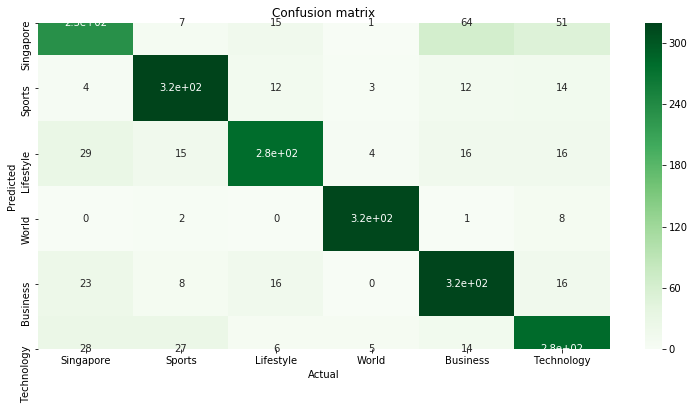

In [46]:
conf_matrix = confusion_matrix(testout, predout)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=category_mapping, 
            yticklabels=category_mapping,
            cmap="Greens")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()